In [ ]:
'''

sudo pip install pystan==2.19.1.1 prophet
!conda install -c conda-forge fbprophet -y
!pip install fbprophet
!pip install --upgrade plotly

'''

'\n\nsudo pip install pystan==2.19.1.1 prophet\n!conda install -c conda-forge fbprophet -y\n!pip install fbprophet\n!pip install --upgrade plotly\n\n'

In [1]:
# FB model for timeseries predictions
from prophet import Prophet
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data path
df = pd.read_csv('/content/flights_train.csv')
df

,date,passengers
0,1949-01-01,64
1,1949-02-01,75
2,1949-03-01,98
3,1949-04-01,93
4,1949-05-01,80
...,...,...
127,1959-08-01,430
128,1959-09-01,383
129,1959-10-01,351
130,1959-11-01,323


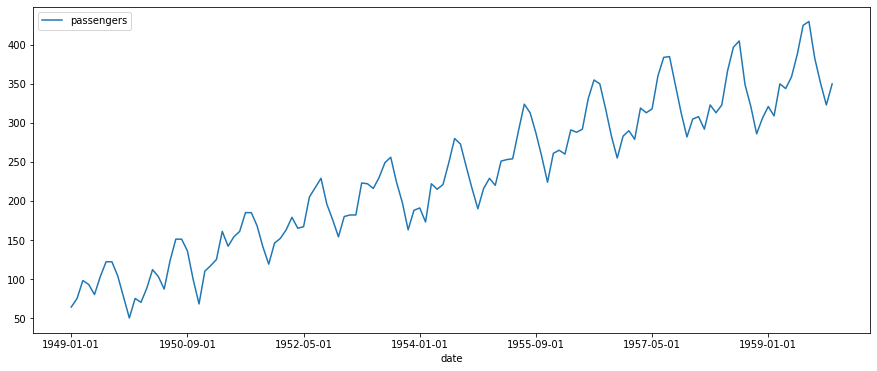

In [4]:
df.plot(x='date', y='passengers', figsize=(15,6));

In [5]:
df.head()

,date,passengers
0,1949-01-01,64
1,1949-02-01,75
2,1949-03-01,98
3,1949-04-01,93
4,1949-05-01,80


In [6]:
df.dtypes

date          object
passengers     int64
dtype: object

In [7]:
df.columns = ['ds', 'y']

In [8]:
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [9]:
model = Prophet()

In [10]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a9h1zrx/zu387lu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a9h1zrx/jo0_9e7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5558', 'data', 'file=/tmp/tmp5a9h1zrx/zu387lu1.json', 'init=/tmp/tmp5a9h1zrx/jo0_9e7c.json', 'output', 'file=/tmp/tmp5a9h1zrx/prophet_model833be8jk/prophet_model-20221103113523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:35:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
df

,ds,y
0,1949-01-01,64
1,1949-02-01,75
2,1949-03-01,98
3,1949-04-01,93
4,1949-05-01,80
...,...,...
127,1959-08-01,430
128,1959-09-01,383
129,1959-10-01,351
130,1959-11-01,323


In [12]:
sample = df[-365:]# last year
sample

,ds,y
0,1949-01-01,64
1,1949-02-01,75
2,1949-03-01,98
3,1949-04-01,93
4,1949-05-01,80
...,...,...
127,1959-08-01,430
128,1959-09-01,383
129,1959-10-01,351
130,1959-11-01,323


In [13]:
forecast = model.predict(sample[['ds']])
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,74.129850,39.005960,65.225583,74.129850,74.129850,-21.690919,-21.690919,-21.690919,-21.690919,-21.690919,-21.690919,0.0,0.0,0.0,52.438931
1,1949-02-01,76.671777,35.348693,61.582210,76.671777,76.671777,-27.938138,-27.938138,-27.938138,-27.938138,-27.938138,-27.938138,0.0,0.0,0.0,48.733639
2,1949-03-01,78.967710,72.568161,100.281898,78.967710,78.967710,6.932776,6.932776,6.932776,6.932776,6.932776,6.932776,0.0,0.0,0.0,85.900487
3,1949-04-01,81.509637,66.379797,91.771293,81.509637,81.509637,-2.430376,-2.430376,-2.430376,-2.430376,-2.430376,-2.430376,0.0,0.0,0.0,79.079261
4,1949-05-01,83.969566,66.771007,93.263972,83.969566,83.969566,-4.741092,-4.741092,-4.741092,-4.741092,-4.741092,-4.741092,0.0,0.0,0.0,79.228474


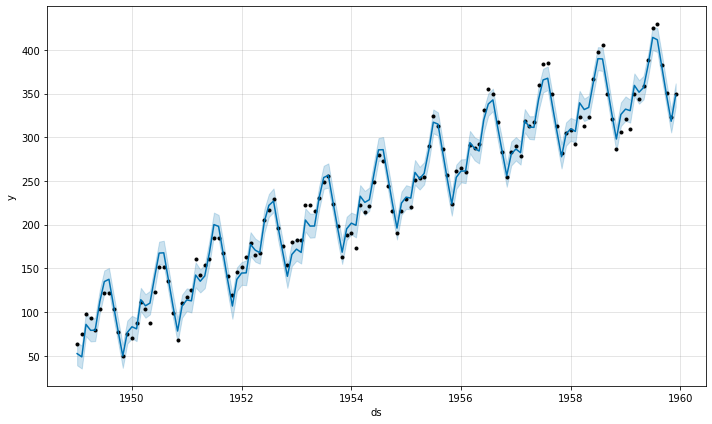

In [14]:
model.plot(forecast);

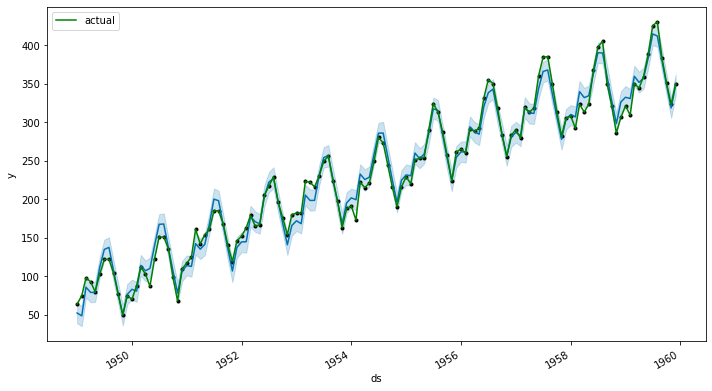

In [15]:
ax = model.plot(forecast).gca()
df.plot(ax=ax, x='ds', y='y', label='actual', color='g');

In [16]:
difference = forecast['yhat'].values - sample['y'].values
difference

array([-1.15610685e+01, -2.62663611e+01, -1.20995132e+01, -1.39207390e+01,
       -7.71525651e-01,  8.91615404e+00,  1.28543132e+01,  1.54936933e+01,
        2.84774288e+00,  1.11049491e+00, -2.67231002e-01,  1.61881027e+00,
        1.31406217e+01, -7.20189659e+00,  2.15636709e+00,  4.16357560e+00,
        2.32674469e+01,  1.69342801e+01,  1.64626067e+01,  1.67866283e+01,
        9.34827229e-01,  8.15879381e+00,  1.02937931e+01, -2.98656701e+00,
       -3.13218778e+00, -1.21626080e+01, -1.86473506e+01, -6.72618883e+00,
       -1.26674381e+01,  6.98707192e+00,  1.50857655e+01,  1.30302026e+01,
       -1.01640129e+00, -4.80968179e+00, -1.21053896e+01, -8.54937008e+00,
       -7.38134606e+00, -1.81513311e+01, -1.61835503e+00,  5.81697657e+00,
        1.01474986e+00, -1.26949767e+00,  5.06264931e+00, -2.07212491e+00,
        4.74178924e-01, -7.22683911e+00, -1.30839238e+01, -1.41055024e+01,
       -1.00161749e+01, -1.38035524e+01, -1.77108456e+01, -2.36141600e+01,
       -1.75443873e+01,  

In [17]:
future = model.make_future_dataframe(freq='MS', periods=12)
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01


In [18]:
future_forecast = model.predict(future)
future_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,74.129850,40.241572,66.147370,74.129850,74.129850,-21.690919,-21.690919,-21.690919,-21.690919,-21.690919,-21.690919,0.0,0.0,0.0,52.438931
1,1949-02-01,76.671777,35.829595,62.093239,76.671777,76.671777,-27.938138,-27.938138,-27.938138,-27.938138,-27.938138,-27.938138,0.0,0.0,0.0,48.733639
2,1949-03-01,78.967710,73.387826,99.327209,78.967710,78.967710,6.932776,6.932776,6.932776,6.932776,6.932776,6.932776,0.0,0.0,0.0,85.900487
3,1949-04-01,81.509637,65.825697,92.277085,81.509637,81.509637,-2.430376,-2.430376,-2.430376,-2.430376,-2.430376,-2.430376,0.0,0.0,0.0,79.079261
4,1949-05-01,83.969566,65.168646,91.933812,83.969566,83.969566,-4.741092,-4.741092,-4.741092,-4.741092,-4.741092,-4.741092,0.0,0.0,0.0,79.228474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,386.590160,419.481252,444.848176,386.317401,386.810342,45.568215,45.568215,45.568215,45.568215,45.568215,45.568215,0.0,0.0,0.0,432.158375
140,1960-09-01,388.429136,387.693533,414.905232,388.093624,388.695844,12.595853,12.595853,12.595853,12.595853,12.595853,12.595853,0.0,0.0,0.0,401.024989
141,1960-10-01,390.208790,359.330886,386.537164,389.821837,390.522063,-17.542583,-17.542583,-17.542583,-17.542583,-17.542583,-17.542583,0.0,0.0,0.0,372.666207
142,1960-11-01,392.047766,331.188590,357.724754,391.608918,392.420011,-47.918334,-47.918334,-47.918334,-47.918334,-47.918334,-47.918334,0.0,0.0,0.0,344.129432


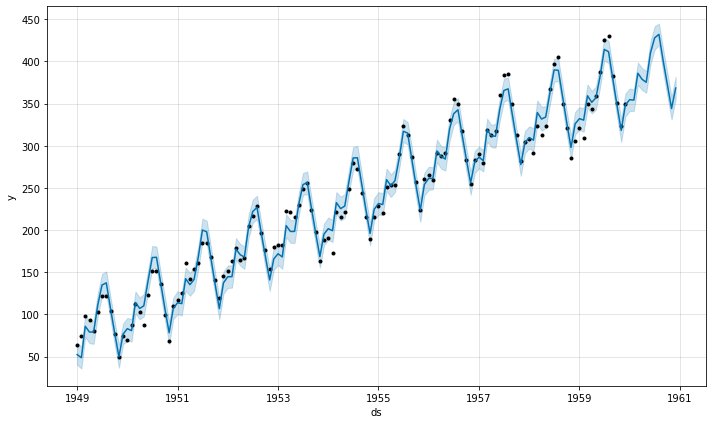

In [19]:
model.plot(future_forecast);

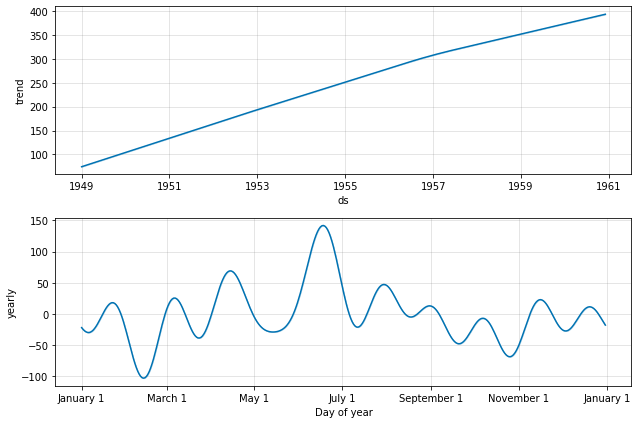

In [20]:
model.plot_components(future_forecast);

In [22]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 95 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638578 sha256=c9db6f83bd2215e13a885addbc6ef55e2f333b6ed007f89fb5d983c186470d58
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the p

In [23]:
from fbprophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
plot_plotly(model, future_forecast)

In [24]:
from fbprophet.diagnostics import cross_validation

In [25]:
df_cv = cross_validation(model, period='30 days', horizon='365 days')

df_cv

INFO:fbprophet:Making 85 forecasts with cutoffs between 1952-01-07 00:00:00 and 1958-12-01 00:00:00


  0%|          | 0/85 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a9h1zrx/r22njw3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a9h1zrx/q3v5cvsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88218', 'data', 'file=/tmp/tmp5a9h1zrx/r22njw3u.json', 'init=/tmp/tmp5a9h1zrx/q3v5cvsj.json', 'output', 'file=/tmp/tmp5a9h1zrx/prophet_modelpy6yniis/prophet_model-20221103114101.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:41:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:41:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a9h1zrx/4yb2lmvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a9h1zrx/5y1qe24u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1952-02-01,161.925006,157.012719,166.975326,163,1952-01-07
1,1952-03-01,189.604763,184.326395,194.744691,179,1952-01-07
2,1952-04-01,196.629759,191.514367,201.519192,165,1952-01-07
3,1952-05-01,168.135551,162.341536,172.936789,167,1952-01-07
4,1952-06-01,207.333423,202.380815,212.472998,205,1952-01-07
...,...,...,...,...,...,...
1015,1959-08-01,407.428187,394.004486,420.666487,430,1958-12-01
1016,1959-09-01,379.862585,367.243233,393.120261,383,1958-12-01
1017,1959-10-01,348.255549,335.295157,361.190628,351,1958-12-01
1018,1959-11-01,317.013823,303.271987,330.388924,323,1958-12-01


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



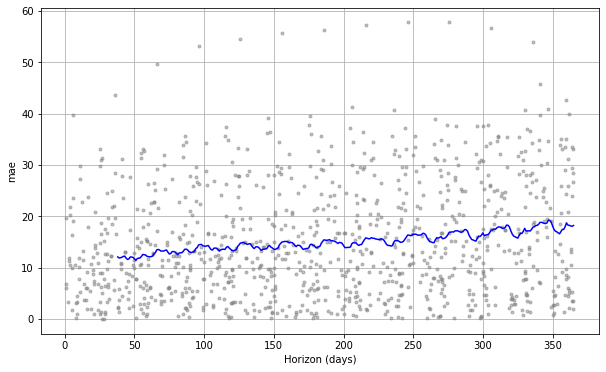

In [26]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')